In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt 
print(tf.__version__)
import keras
from keras.layers import Conv2D
from keras.layers import Input
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from keras.layers import ZeroPadding2D
from keras.layers import UpSampling2D
from keras.layers.merge import add, concatenate
from keras.models import Model
import numpy as np
import pickle
import sys
import os
import cv2

2.8.0


In [2]:
from keras.datasets import cifar10

In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test =tf.keras.utils.to_categorical(y_test)
class_num = y_test.shape[1]

In [8]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [9]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), input_shape=X_train.shape[1:], padding='same',activation = "relu"))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(64, 3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(64, 3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())
    
model.add(keras.layers.Conv2D(128, 3, activation='relu', padding='same'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(class_num, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [10]:
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0

In [11]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64)

Epoch 1/5
782/782 [==============================] - 169s 215ms/step - loss: 1.5753 - accuracy: 0.4393 - val_loss: 1.3410 - val_accuracy: 0.5179
Epoch 2/5
782/782 [==============================] - 179s 229ms/step - loss: 1.1413 - accuracy: 0.5975 - val_loss: 1.1196 - val_accuracy: 0.5951
Epoch 3/5
782/782 [==============================] - 173s 221ms/step - loss: 0.9760 - accuracy: 0.6599 - val_loss: 0.7761 - val_accuracy: 0.7266
Epoch 4/5
782/782 [==============================] - 176s 225ms/step - loss: 0.8803 - accuracy: 0.6949 - val_loss: 0.7424 - val_accuracy: 0.7405
Epoch 5/5
782/782 [==============================] - 178s 228ms/step - loss: 0.8189 - accuracy: 0.7177 - val_loss: 0.7279 - val_accuracy: 0.7418


In [12]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 74.18%


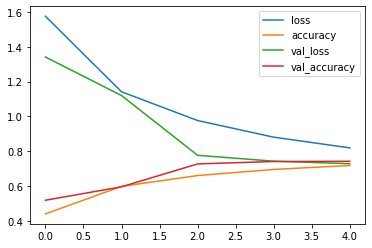

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot()
plt.show()

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Charger l'image comme matrice de pixels
img = np.array(Image.open('image_chat.jpg'))


In [15]:
img.shape

(816, 588, 3)

In [16]:
chat = cv2.resize(img, (32, 32)) 

In [17]:
chat.shape

(32, 32, 3)

In [18]:
pil_image=Image.fromarray(chat)
pil_image.show()

In [19]:
image = tf.keras.utils.load_img('image_chat.jpg', target_size=(32, 32))
image = np.array(image) / 255.0
image = np.expand_dims(image, axis=0)

In [20]:
image.shape

(1, 32, 32, 3)

In [21]:
predict = model.predict(image)
print(predict)

[[0.15837122 0.02872746 0.03023153 0.47704226 0.05064503 0.08586895
  0.04307069 0.0523627  0.00656585 0.06711429]]


In [22]:
print(np.argmax(predict))

3
